In [1]:
%pip install pandas
%pip install openpyxl
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
## INPUT DATA
# Membaca file Excel
data_gempa = pd.read_excel('gempa.xlsx')

# Menampilkan beberapa baris pertama data
print(data_gempa.head())

   No     Event ID                    Date time  Latitude   Longitude  \
0   1  bmg2020ccqw  2020-01-30T21:53:06.872494Z -1.982165   99.878738   
1   2  bmg2020ccpk  2020-01-30T21:07:52.349556Z -7.153154  122.253876   
2   3  bmg2020ccmh    2020-01-30T19:32:48.5943Z  2.458276   98.994804   
3   4  bmg2020cchn  2020-01-30T17:08:59.590139Z -8.321798  118.057121   
4   5  bmg2020ccen  2020-01-30T15:37:07.078598Z -0.386127  124.079361   

   Magnitude Mag Type  Depth (km)  Phase Count  Azimuth Gap  \
0   4.847996        M          50          104   123.700470   
1   3.454479        M          10            9   173.481987   
2   4.110849        M         142           23   106.138226   
3   4.158470        M         207           32   109.294907   
4   4.329129        M          57           38    73.874773   

                      Location Agency  
0  Southern Sumatra, Indonesia   BMKG  
1                   Flores Sea   BMKG  
2  Northern Sumatra, Indonesia   BMKG  
3    Sumbawa Region, I

In [3]:
# Menghilangkan kolom yang tidak relevan
data_gempa = data_gempa[['Date time', 'Latitude', 'Longitude', 'Magnitude']]
# Menghapus baris dengan nilai yang hilang atau tidak valid
data_gempa = data_gempa.dropna()

# Mengubah format tanggal menjadi datetime
data_gempa['Date time'] = pd.to_datetime(data_gempa['Date time'])

# Mengurutkan data berdasarkan tanggal
data_gempa = data_gempa.sort_values('Date time')

# Menampilkan beberapa baris pertama data yang telah diproses
print(data_gempa.head())


                           Date time  Latitude   Longitude  Magnitude
324 2020-01-01 00:02:21.183174+00:00 -2.730515  127.898819   3.294128
323 2020-01-01 04:27:36.113891+00:00 -3.387574  128.378189   2.251033
322 2020-01-01 04:38:04.738063+00:00  2.061754  126.647492   4.114948
321 2020-01-01 05:31:55.150735+00:00 -9.256731  121.274017   3.817840
320 2020-01-01 06:01:13.844505+00:00 -6.750792  129.847611   4.815453


In [4]:
%pip install matplotlib
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


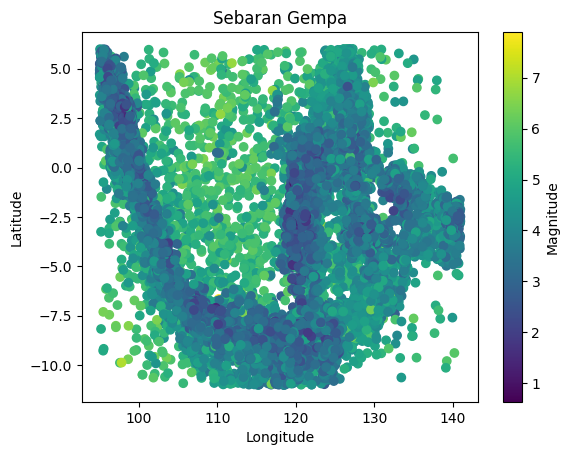

In [5]:

# Visualisasi sebaran gempa berdasarkan lokasi
plt.scatter(data_gempa['Longitude'], data_gempa['Latitude'], c=data_gempa['Magnitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Sebaran Gempa')
plt.colorbar(label='Magnitude')
plt.show()


In [6]:
%pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
# Membuat 2 Kolom untuk Label
data_gempa.loc[data_gempa['Magnitude'] < 2, ['Golongan gempa', 'Keamanan']] = ['Gempa Ultra Mikro', 'Normal']
data_gempa.loc[(data_gempa['Magnitude'] >= 2) & (data_gempa['Magnitude'] < 3), ['Golongan gempa', 'Keamanan']] = ['Gempa Mikro', 'Tidak Berbahaya']
data_gempa.loc[(data_gempa['Magnitude'] >= 3) & (data_gempa['Magnitude'] < 4), ['Golongan gempa', 'Keamanan']] = ['Gempa Kecil', 'Waspada']
data_gempa.loc[(data_gempa['Magnitude'] >= 4) & (data_gempa['Magnitude'] < 5), ['Golongan gempa', 'Keamanan']] = ['Gempa Sedang', 'Waspada']
data_gempa.loc[(data_gempa['Magnitude'] >= 5) & (data_gempa['Magnitude'] <= 6), ['Golongan gempa', 'Keamanan']] = ['Gempa Besar', 'Siaga']
data_gempa.loc[data_gempa['Magnitude'] > 6, ['Golongan gempa', 'Keamanan']] = ['Gempa Merusak', 'Awas']
data_gempa

,Date time,Latitude,Longitude,Magnitude,Golongan gempa,Keamanan
324,2020-01-01 00:02:21.183174+00:00,-2.730515,127.898819,3.294128,Gempa Kecil,Waspada
323,2020-01-01 04:27:36.113891+00:00,-3.387574,128.378189,2.251033,Gempa Mikro,Tidak Berbahaya
322,2020-01-01 04:38:04.738063+00:00,2.061754,126.647492,4.114948,Gempa Sedang,Waspada
321,2020-01-01 05:31:55.150735+00:00,-9.256731,121.274017,3.817840,Gempa Kecil,Waspada
320,2020-01-01 06:01:13.844505+00:00,-6.750792,129.847611,4.815453,Gempa Sedang,Waspada
...,...,...,...,...,...,...
33794,2023-05-29 16:00:00.179908+00:00,-7.216671,130.536133,4.560246,Gempa Sedang,Waspada
33793,2023-05-29 17:35:38.788331+00:00,-3.521351,118.835861,3.149734,Gempa Kecil,Waspada
33792,2023-05-29 18:11:43.911152+00:00,-0.580454,122.639313,3.549325,Gempa Kecil,Waspada
33791,2023-05-29 23:15:51.538928+00:00,-6.412368,129.998138,4.313980,Gempa Sedang,Waspada


In [80]:
from sklearn.preprocessing import LabelEncoder

# Menggunakan LabelEncoder untuk kolom 'Golongan gempa' dan 'Keamanan'
label_encoder = LabelEncoder()
data_gempa['Golongan gempa'] = label_encoder.fit_transform(data_gempa['Golongan gempa'])
data_gempa['Keamanan'] = label_encoder.fit_transform(data_gempa['Keamanan'])

In [81]:
# Pisahkan fitur dan target
X = data_gempa[['Magnitude']]
y = data_gempa['Golongan gempa']

# Bagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [82]:
print(len(X_train))

27621


# **Random forest**

In [83]:
import tensorflow as tf
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Inisialisasi model Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Latih model dengan data pelatihan
model.fit(X_train, y_train)

# Prediksi magnitude dengan data pengujian
y_pred = model.predict(X_test)

# Evaluasi model menggunakan mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.00159084853750362


In [ ]:
# Simpan model Scikit-learn dalam format pkl
import joblib
joblib.dump(model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [ ]:
from sklearn.metrics import r2_score

# Menghitung R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.9988713119456623


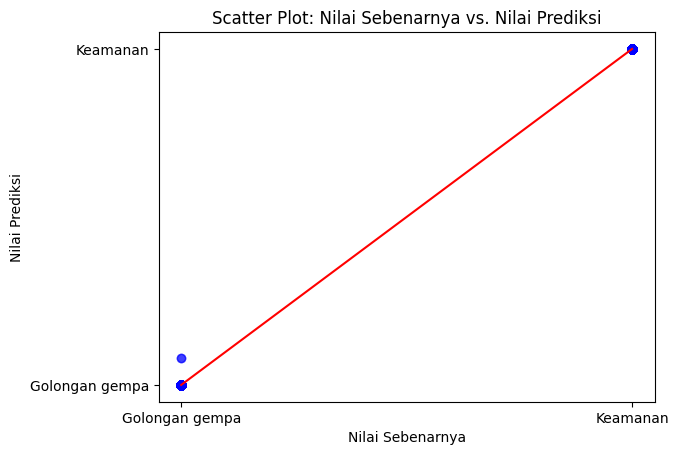

In [ ]:
import matplotlib.pyplot as plt

# Membuat scatter plot
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Garis diagonal
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Nilai Prediksi')
plt.title('Scatter Plot: Nilai Sebenarnya vs. Nilai Prediksi')
plt.show()


# **Support Vector Machine**

In [78]:
import numpy as np
import tensorflow as tf
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Generate dummy regression data
X, y = make_regression(n_samples=100, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVR model for "Golongan gempa"
model_golongan = SVR(kernel='linear')
model_golongan.fit(X_train, y_train)

# Initialize and train the SVR model for "Keamanan"
model_keamanan = SVR(kernel='linear')
model_keamanan.fit(X_train, y_train)

# Convert the SVR models to TensorFlow models
input_shape = (X_train.shape[1],)
input_tensor = tf.keras.Input(shape=input_shape)
output_tensor_golongan = tf.keras.layers.Dense(1)(input_tensor)  # Add a dense layer for regression
output_tensor_keamanan = tf.keras.layers.Dense(1)(input_tensor)  # Add a dense layer for regression
tf_model_golongan = tf.keras.Model(inputs=input_tensor, outputs=output_tensor_golongan)
tf_model_keamanan = tf.keras.Model(inputs=input_tensor, outputs=output_tensor_keamanan)

# Copy weights from the trained SVR models to the TensorFlow models
tf_model_golongan.set_weights([model_golongan.coef_.flatten(), model_golongan.intercept_])
tf_model_keamanan.set_weights([model_keamanan.coef_.flatten(), model_keamanan.intercept_])

# Convert the TensorFlow models to TFLite format
converter_golongan = tf.lite.TFLiteConverter.from_keras_model(tf_model_golongan)
tflite_model_golongan = converter_golongan.convert()

converter_keamanan = tf.lite.TFLiteConverter.from_keras_model(tf_model_keamanan)
tflite_model_keamanan = converter_keamanan.convert()

# Save the TFLite models to files
with open('svm_golongan_model.tflite', 'wb') as file:
    file.write(tflite_model_golongan)

with open('svm_keamanan_model.tflite', 'wb') as file:
    file.write(tflite_model_keamanan)


ValueError: ignored

In [67]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Create an SVM model
model = SVC(kernel='linear')

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi untuk kolom "Keamanan"
accuracy = accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1_score = f1_score(y_test, y_pred, average='macro')

# Evaluate the model
print("Accuracy:", accuracy)
print("Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)


Accuracy: 0.9958007529684333
Metrics for Keamanan:
Accuracy: 0.9958007529684333
Precision: 0.9961582588883982
Recall: 0.9733896836863208
F1-score: 0.984412165836937


In [70]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print ("\nHere is the classification Model Support Vector Machine report:") 
print (classification_report(y_test, y_pred))


Here is the classification Model Support Vector Machine report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       331
           1       1.00      1.00      1.00      2972
           2       1.00      0.93      0.96        44
           3       1.00      1.00      1.00      1944
           4       0.99      1.00      1.00      1458
           5       1.00      0.94      0.97       157

    accuracy                           1.00      6906
   macro avg       1.00      0.97      0.98      6906
weighted avg       1.00      1.00      1.00      6906



In [71]:
# Menampilkan Hasil Confusion Matrix dari Model SVM
conf_svm = confusion_matrix(y_test, y_pred)
print(conf_svm)

[[ 321    0    0    0   10    0]
 [   0 2972    0    0    0    0]
 [   3    0   41    0    0    0]
 [   0    5    0 1939    0    0]
 [   0    2    0    0 1456    0]
 [   0    0    0    9    0  148]]


In [73]:
# Convert the SVM model to TensorFlow model
input_shape = X_train_scaled.shape[1:]
input_tensor = tf.keras.Input(shape=input_shape)
svm_output = model.decision_function(input_tensor)
output_tensor = tf.keras.activations.sigmoid(svm_output)  # Apply sigmoid activation for binary classification
tf_model = tf.keras.Model(inputs=input_tensor, outputs=output_tensor)

# Convert the TensorFlow model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(tf_model)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('svm_model.tflite', 'wb') as file:
    file.write(tflite_model)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


TypeError: ignored

In [86]:
#codingan asli
import tensorflow as tf
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Inisialisasi model Support Vector Regressor untuk kolom "Golongan gempa"
model_golongan = SVC(kernel='linear')
model_golongan.fit(X_train, y_train['Golongan gempa'])
y_pred_golongan = model_golongan.predict(X_test)
mse_golongan = mean_squared_error(y_test['Golongan gempa'], y_pred_golongan)
print("Mean Squared Error (Golongan gempa):", mse_golongan)

# Inisialisasi model Support Vector Regressor untuk kolom "Keamanan"
model_keamanan = SVC(kernel='linear')
model_keamanan.fit(X_train, y_train['Keamanan'])
y_pred_keamanan = model_keamanan.predict(X_test)
mse_keamanan = mean_squared_error(y_test['Keamanan'], y_pred_keamanan)
print("Mean Squared Error (Keamanan):", mse_keamanan)

Mean Squared Error (Golongan gempa): 0.035621198957428324


KeyError: ignored

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Menghitung metrik evaluasi untuk kolom "Golongan gempa"
accuracy_golongan = accuracy_score(y_test['Golongan gempa'], y_pred_golongan)
precision_golongan = precision_score(y_test['Golongan gempa'], y_pred_golongan, average='macro')
recall_golongan = recall_score(y_test['Golongan gempa'], y_pred_golongan, average='macro')
f1_golongan = f1_score(y_test['Golongan gempa'], y_pred_golongan, average='macro')

# Menghitung metrik evaluasi untuk kolom "Keamanan"
accuracy_keamanan = accuracy_score(y_test['Keamanan'], y_pred_keamanan)
precision_keamanan = precision_score(y_test['Keamanan'], y_pred_keamanan, average='macro')
recall_keamanan = recall_score(y_test['Keamanan'], y_pred_keamanan, average='macro')
f1_keamanan = f1_score(y_test['Keamanan'], y_pred_keamanan, average='macro')

# Menampilkan hasil metrik evaluasi
print("Metrics for Golongan gempa:")
print("Accuracy:", accuracy_golongan)
print("Precision:", precision_golongan)
print("Recall:", recall_golongan)
print("F1-score:", f1_golongan)
print()

print("Metrics for Keamanan:")
print("Accuracy:", accuracy_keamanan)
print("Precision:", precision_keamanan)
print("Recall:", recall_keamanan)
print("F1-score:", f1_keamanan)


Metrics for Golongan gempa:
Accuracy: 0.998262380538662
Precision: 0.9985257535233379
Recall: 0.9881606526783416
F1-score: 0.9932575022198677

Metrics for Keamanan:
Accuracy: 0.998262380538662
Precision: 0.9985506016941537
Recall: 0.9857927832140099
F1-score: 0.9920690214668987


In [ ]:
import joblib

# Membuat dictionary untuk menyimpan dua model
models = {'golongan_gempa': model_golongan, 'keamanan': model_keamanan}

# Menyimpan dictionary model ke file
joblib.dump(models, 'svm_models.pkl')

['svm_models.pkl']

# **Menggabungkan Kedua Model**

In [ ]:
import pickle

# Memuat model Random Forest dari file
random_forest_model = joblib.load('rfr_model.pkl')

# Memuat model SVM dari file
svm_models = joblib.load('svm_models.pkl')

# Menggabungkan kedua model menjadi satu dictionary
models = {'random_forest': random_forest_model, 'svm': svm_models}

# Menyimpan dictionary model ke file
with open('disastershield.pkl', 'wb') as file:
    pickle.dump(models, file)

In [ ]:
# Memuat model dari file
with open('combined_model.pkl', 'rb') as file:
    loaded_models = pickle.load(file)

# Memuat model Random Forest
loaded_random_forest_model = loaded_models['random_forest']

# Memuat model SVM
loaded_svm_models = loaded_models['svm']


In [ ]:
import joblib

# Menyimpan model ke file
joblib.dump(model, 'disastershield_model.pkl')

# Memuat model dari file
loaded_model = joblib.load('disastershield_model.pkl')

# Contoh penggunaan model yang telah dimuat
y_pred_loaded = loaded_model.predict(X_test)

print(y_pred_loaded)

[[3. 3.]
 [2. 0.]
 [4. 4.]
 ...
 [0. 2.]
 [3. 3.]
 [1. 4.]]
